Data sets include:

* Signalized Intersections
* Pittsburgh Regional Transit Monthly Average Ridership by Route
* City of Pittsburgh Traffic Count

Introduction: Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

The Metric: Describe your metric, and what features are you measuring. What datasets are you using?

The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in 
Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.

Conclusion: Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

Polly - intro
Ronnie - Metric
best neighborhood - all
conclusion - Geffen

# Introduction

The metric we chose for our project is "safety around motor vehicles". The 3 data sets we used were: amount of signalized intersections, number of street signs and daily vehicle speed. The main 3 submetrics we looked at within each data set were, number of stop signs in each neighborhood, number of signalized intersections per neighborhood and the percent of drivers going over the speed limit in each neighborhood. Originally we were attempting to look at a wider range of transportation data and have our metric be "ability to get around without the use of a car", in which we would look at bus routes and pogoh data, but we ended up having issues with those data sets. We attempted to find replacements for them that still fit within our original metric but ended up drifting too far away from it, to the point where we pivoted to our current metric.

# The Metric

# The Best Neighborhood

<Axes: >

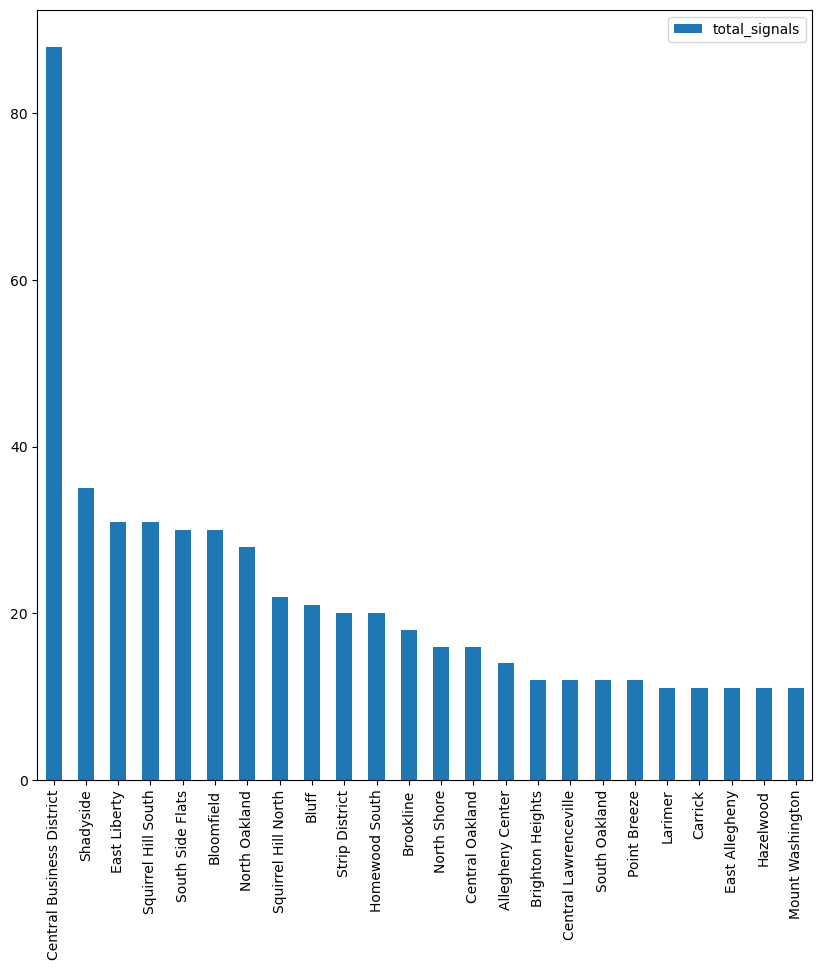

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

signalInter = pd.read_csv("SignalizedIntersections.csv")

#count the amount of signalized intersections per neighborhood

neighborhoodDict = dict()

for value, row in signalInter.iterrows():
    neighborhood = row["neighborhood"]
    if neighborhood in neighborhoodDict and pd.notna(neighborhood):
        neighborhoodDict[neighborhood] += 1
    else:
        neighborhoodDict[neighborhood] = 1

dataFrameSums = pd.Series(neighborhoodDict)

dataFrameSums= {'total_signals':dataFrameSums}
dataFrameSums=pd.DataFrame(dataFrameSums)

reduced = dataFrameSums[dataFrameSums["total_signals"]>10]
increasingSorted = reduced.sort_values(by = 'total_signals', ascending = False)
#plot a bar graph

increasingSorted.plot.bar(figsize=(10, 10))

<Axes: title={'center': 'Percent over Speed Limit in Each Neighborhood'}, xlabel='neighborhood'>

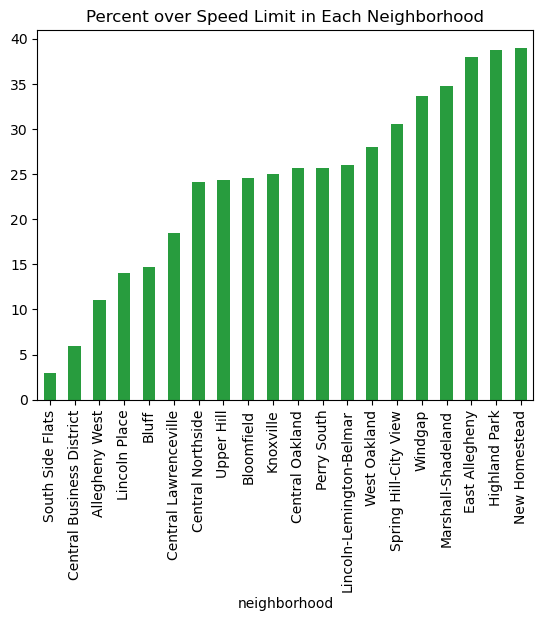

In [2]:
trafficData = pd.read_csv("SpeedingData.csv", index_col="_id")
df = trafficData[["neighborhood", "percent_over_limit"]]
df = df.dropna(subset=["percent_over_limit"])
avg = df.groupby("neighborhood")["percent_over_limit"].mean()
avg = avg.nsmallest(n=20)
avg.plot(x='Neighborhoods', y='Percent over Speed Limit', kind='bar', title='Percent over Speed Limit in Each Neighborhood', color='#289c3e')

# Conclusion